In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import paths
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage.transform import resize
from skimage import exposure
from scipy.spatial import distance

In [2]:
image1 = cv2.imread('C:/ariadh/python/idb/Objects/brain/image_0014.jpg')

In [3]:
image2 = cv2.imread('C:/ariadh/python/idb/Objects/brain/image_0013.jpg')

In [4]:
image3 = cv2.imread('C:/ariadh/python/idb/Objects/brain/image_0015.jpg')

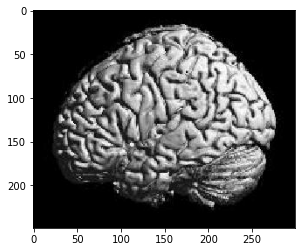

In [5]:
plt.imshow(image1)

In [6]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

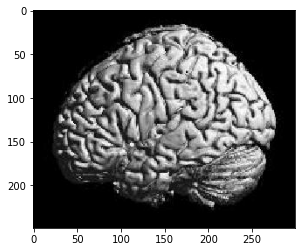

In [7]:
plt.imshow(image1)

In [8]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [9]:
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

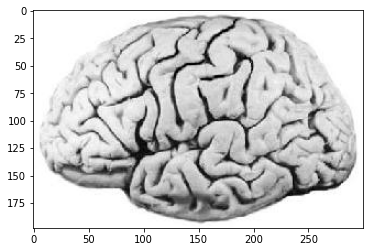

In [10]:
plt.imshow(image2)

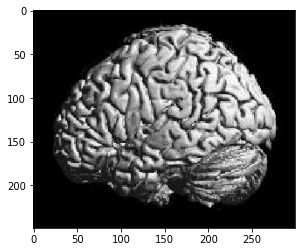

In [11]:
plt.imshow(image3)

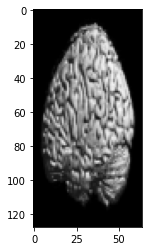

In [15]:
resized_img1 = resize(image1, (128,64)) 
plt.imshow(resized_img1)
resized_img2 = resize(image2, (128,64)) 
resized_img3 = resize(image3, (128,64)) 

In [17]:
fd1, hog_image1 = hog(resized_img1, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,multichannel=True)
fd2, hog_image2 = hog(resized_img2, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,multichannel=True)
fd3, hog_image3 = hog(resized_img3, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,multichannel=True)
histfd1 = cv2.normalize(fd1, fd1)
histfd1_f=histfd1.flatten()
histfd2 = cv2.normalize(fd2, fd2)
histfd2_f=histfd2.flatten()
histfd3 = cv2.normalize(fd3, fd3)
histfd3_f=histfd3.flatten()
histfd1_f

array([0., 0., 0., ..., 0., 0., 0.])

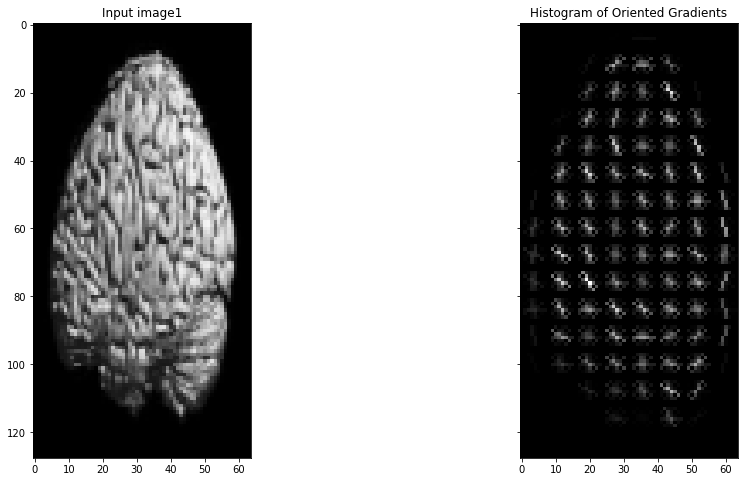

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img1, cmap=plt.cm.gray) 
ax1.set_title('Input image1') 

# Rescale histogram for better display 
hog_image1_rescaled = exposure.rescale_intensity(hog_image1, in_range=(0, 10)) 

ax2.imshow(hog_image1_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [19]:
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
	d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
		for (a, b) in zip(histA, histB)])
	# return the chi-squared distance
	return d

In [20]:
d = chi2_distance(histfd1_f, histfd2_f)
d

9.930047656517544

In [21]:
d = chi2_distance(histfd2_f, histfd3_f)
d

10.364151092975415

In [22]:
d = chi2_distance(histfd1_f, histfd3_f)
d

3.69552460785723

In [23]:
imagePaths = list(paths.list_images('C:/ariadh/python/idb/Objects/brain/'))

In [24]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [26]:
i=0
dlist=[]
for (i, imagePath) in enumerate(imagePaths):
    # load the input image
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    imagedb = cv2.imread(imagePath)
    imagedb = cv2.cvtColor(imagedb, cv2.COLOR_BGR2RGB)
    resized_imgdb = resize(imagedb, (128,64)) 
    fddb, hog_imagedb = hog(resized_imgdb, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
    histfddb = cv2.normalize(fddb, fd1)
    histfddb_f=histfddb.flatten()
    #d=chi2_distance(histfddb_f, histfd1_f)
    d = distance.euclidean(histfddb_f,histfd1_f)
    dlist.append((d,imagePath))
    

[INFO] processing image 1/98
[INFO] processing image 2/98
[INFO] processing image 3/98
[INFO] processing image 4/98
[INFO] processing image 5/98
[INFO] processing image 6/98
[INFO] processing image 7/98
[INFO] processing image 8/98
[INFO] processing image 9/98
[INFO] processing image 10/98
[INFO] processing image 11/98
[INFO] processing image 12/98
[INFO] processing image 13/98
[INFO] processing image 14/98
[INFO] processing image 15/98
[INFO] processing image 16/98
[INFO] processing image 17/98
[INFO] processing image 18/98
[INFO] processing image 19/98
[INFO] processing image 20/98
[INFO] processing image 21/98
[INFO] processing image 22/98
[INFO] processing image 23/98
[INFO] processing image 24/98
[INFO] processing image 25/98
[INFO] processing image 26/98
[INFO] processing image 27/98
[INFO] processing image 28/98
[INFO] processing image 29/98
[INFO] processing image 30/98
[INFO] processing image 31/98
[INFO] processing image 32/98
[INFO] processing image 33/98
[INFO] processing i

In [27]:
dlist.sort(key=lambda x: x[0])

In [28]:
dresult=[]
for i in range(0,8):
    dresult.append(dlist[i][0])

In [29]:
imresult=[]
for i in range(0,8):
    image = cv2.imread(dlist[i][1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imresult.append(image)

C:\Users\RTEBOU~1\AppData\Local\Temp/ipykernel_21360/2929108600.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)


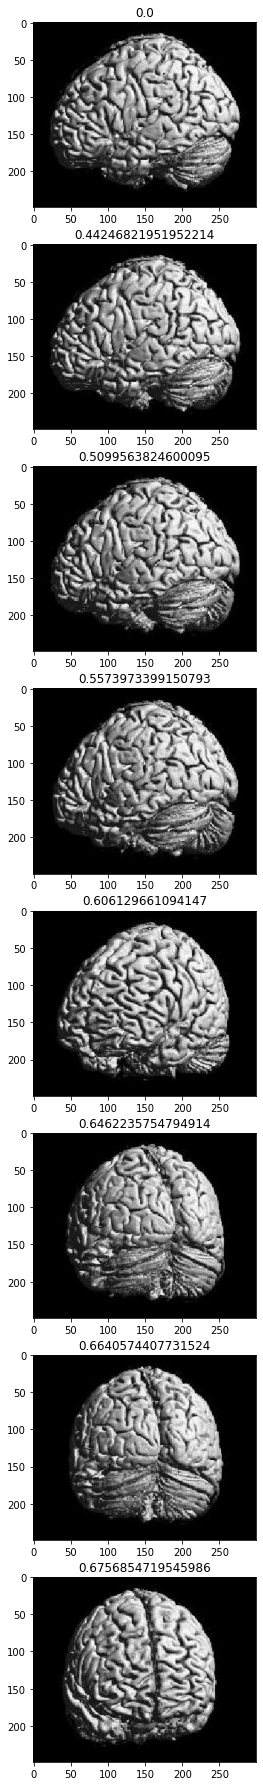

In [31]:
show_images(imresult,8,dresult)